In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [194]:
def cleaned_NO2_data(file_name):
    city_df = pd.read_csv(file_name)

    #initial basic cleaning
    city_df.rename(columns = {city_df.columns[0]: 'date', city_df.columns[1]: 'NO2_reading'}, inplace = True)
    fill_value = float(city_df['NO2_reading'][5]) #this is the NASA fill value; will use this to remove undesired readings
    city_df = city_df.iloc[7::,] #removing the initial 6 rows that do not contain data (they contain info about data paramters)
    
    #converting the datatype of the columns to a format suitable for analysis
    city_df['date'] = pd.to_datetime(city_df['date'])
    city_df = city_df[['date', 'NO2_reading']]
    city_df['NO2_reading'] = city_df['NO2_reading'].astype(float)

    #removing rows where the NO2 reading matches the NASA fill value:
    city_df = city_df[city_df['NO2_reading'] != fill_value]

   

    return city_df

In [241]:
#Saving the cleaned data frames as csv files on my local machine

#passing the working directory to a variable and making a new directory (contained within the working directory)
#to hold the soon-to-be made csv files
my_local_path = '/Users/josephmacula/umn_bootcamp/capstone_project/china_data'
os.makedirs('cleaned_files')

#Getting all the filenames in the working directory whose file type is .csv
csv_files_to_clean = [file for file in os.listdir(my_local_path) if file.endswith('.csv')] 

#Creating a list whose elements are lists. Each list contains a filename and the corresponding cleaned dataframe
cleaned_data_frames = [[x, cleaned_NO2_data(x)] for x in csv_files_to_clean]

#Creating a csv file for each cleaned dataframe and saving that csv file in the newly created 'cleaned_files' directory
for i in range(0, len(cleaned_data_frames)):
     cleaned_data_frames[i][1].to_csv(my_local_path + '/cleaned_files/cleaned_' + cleaned_data_frames[i][0], index = False)

In [263]:
data_frames_for_plotting = []

for i in cleaned_data_frames:
    i[1]['year'] = i[1]['date'].dt.year
    i[1]['month'] = i[1]['date'].dt.month
    median_monthly_values = i[1].groupby(['year', 'month'])['NO2_reading'].median().reset_index()
    median_monthly_values['month_year'] = median_monthly_values['month'].astype(str) + '-' + median_monthly_values['year'].astype(str)
    data_frames_for_plotting.append([i[0], median_monthly_values])


['ganzhouNO2.csv',
      year  month   NO2_reading month_year
 0    2014      1  6.299643e+15     1-2014
 1    2014      2  5.810454e+15     2-2014
 2    2014      3  7.013677e+15     3-2014
 3    2014      4  6.312368e+15     4-2014
 4    2014      5  5.011049e+15     5-2014
 ..    ...    ...           ...        ...
 134  2025      3  5.760606e+15     3-2025
 135  2025      4  3.706791e+15     4-2025
 136  2025      5  4.189619e+15     5-2025
 137  2025      6  4.096897e+15     6-2025
 138  2025      7  4.698712e+15     7-2025
 
 [139 rows x 4 columns]]

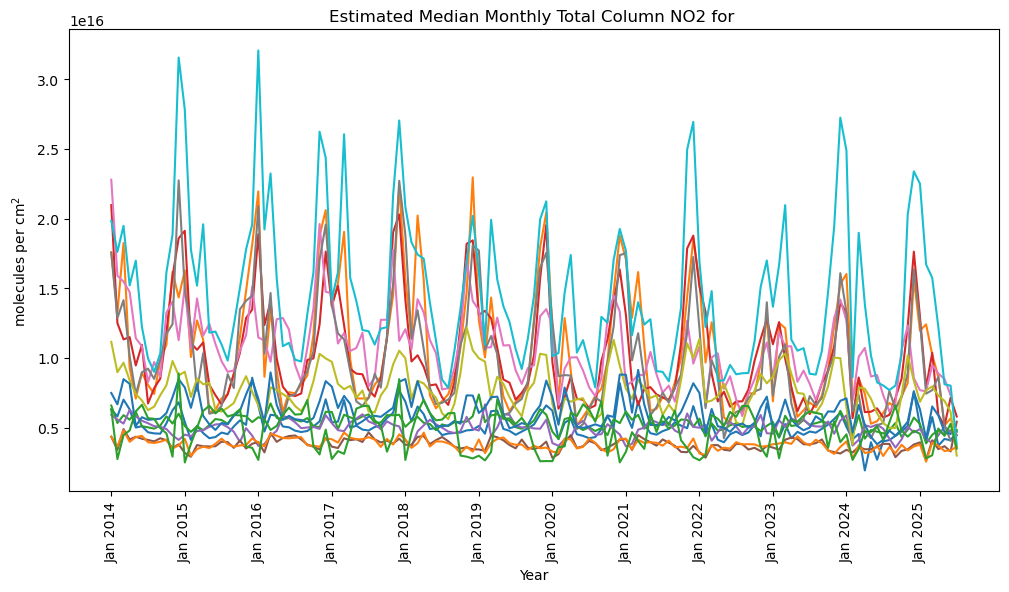

In [265]:
fig, ax = plt.subplots(figsize = (12,6))

for i in range(0, len(data_frames_for_plotting)):
    ax.plot(data_frames_for_plotting[i][1]['month_year'], data_frames_for_plotting[i][1]['NO2_reading'])
tick_positions = median_monthly_values['month_year'][::12]
tick_labels = tick_positions.apply(lambda x: 'Jan ' + x[2::])
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation='vertical')
plt.xlabel('Year')
plt.ylabel('molecules per cm$^2$')
plt.title('Estimated Median Monthly Total Column NO2')
plt.show()